In [1]:
from fk_filtering.models.Linear_Gauss import Create_data
from fk_filtering import *


In [2]:
object_transition = lambda: Create_data.Linear_Gauss_Bootstrap(0.9*pt.eye(2), pt.eye(2), pt.eye(2)/(0.1), pt.device('cpu'))
sim_object = lambda : Create_data.Linear_Gaussian_Object(object_transition(), pt.eye(2)*0.02, pt.eye(2), pt.device('cpu'))
model.create_simulated_files('./fk_filtering/models/Linear_Gauss/data/', 1000, sim_object, 10, cores =-1)

In [ ]:
object_transition = lambda: Create_data.Linear_Gauss_Bootstrap(0.9*pt.eye(2), pt.eye(2), pt.eye(2), pt.device('cpu'))
sim_object = lambda : Create_data.Linear_Gaussian_Object(object_transition(), pt.eye(2)*0.1, pt.eye(2)*0.5, pt.device('cpu'))
model.create_simulated_files('./fk_filtering/models/Linear_Gauss/data/', 1000, sim_object, 5000, cores =-1)

No resample


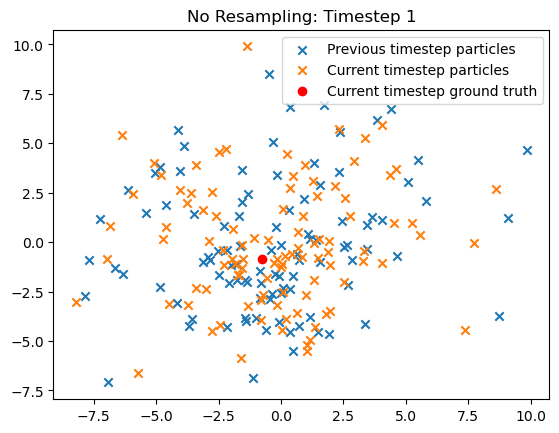

No resample


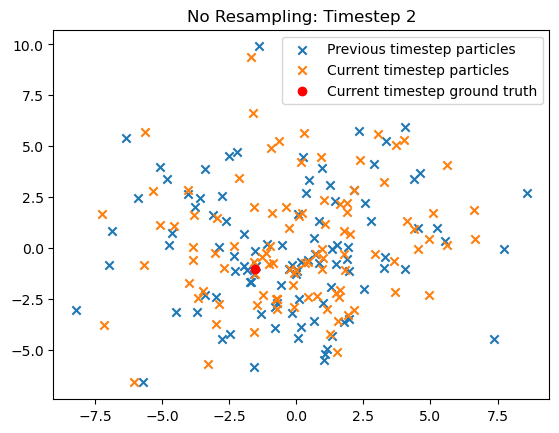

No resample


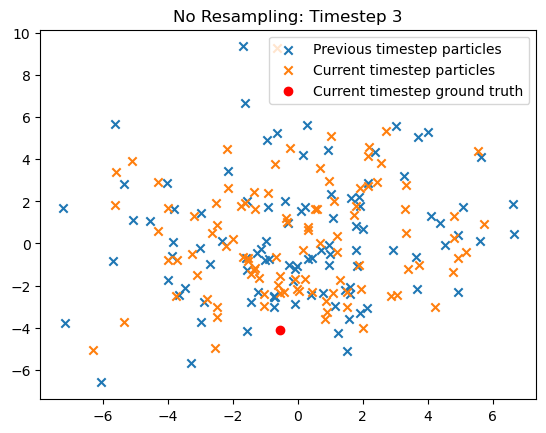

No resample


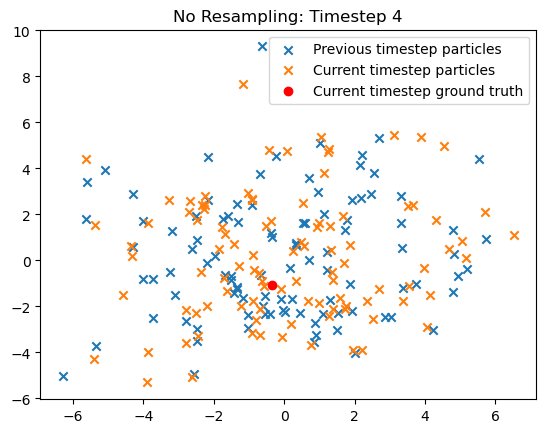

No resample


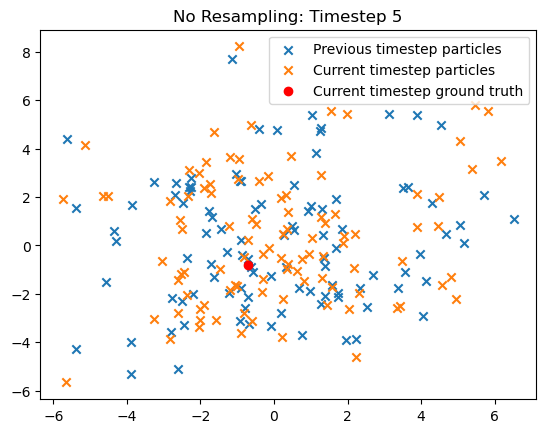

No resample


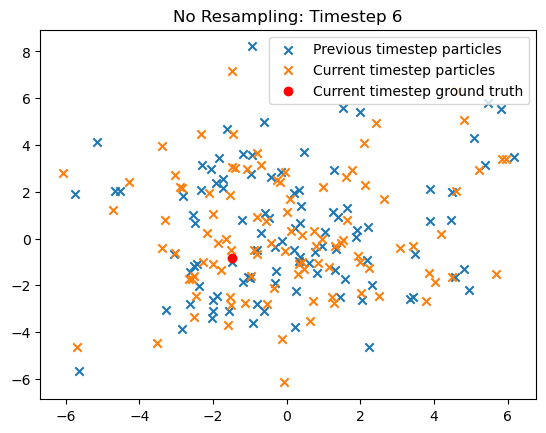

No resample


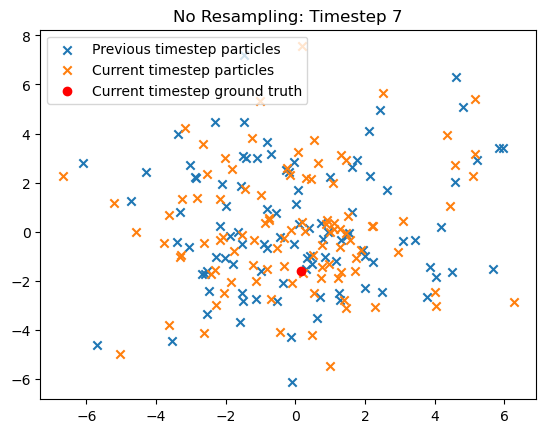

No resample


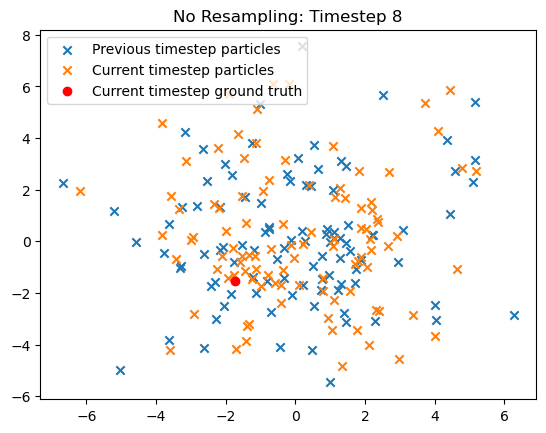

No resample


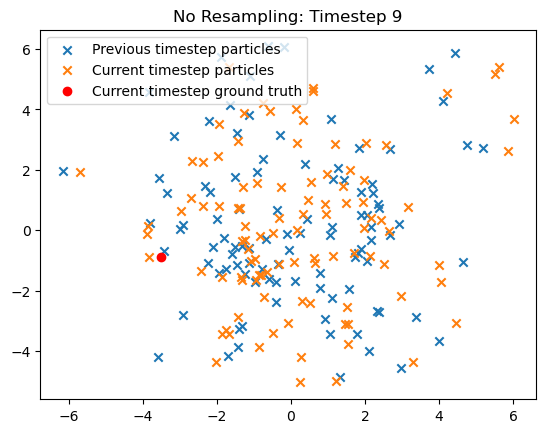

No resample


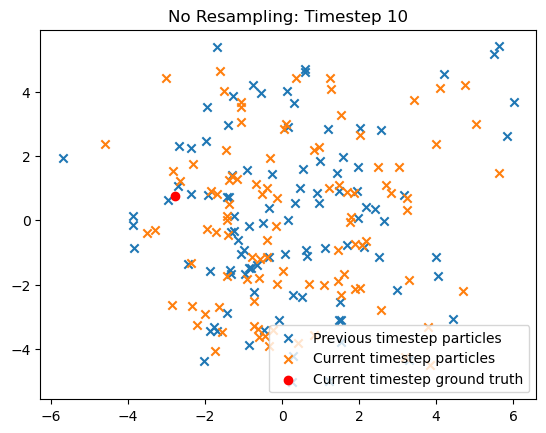

No resample


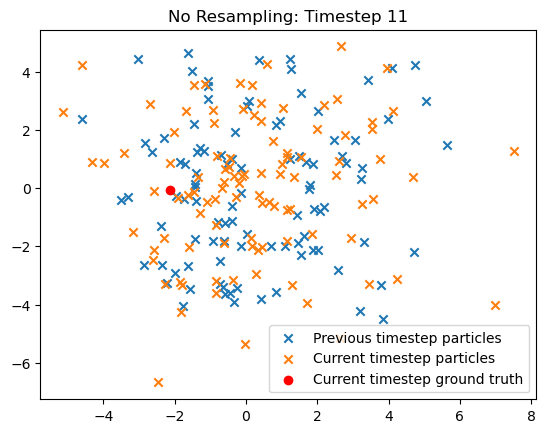

No resample


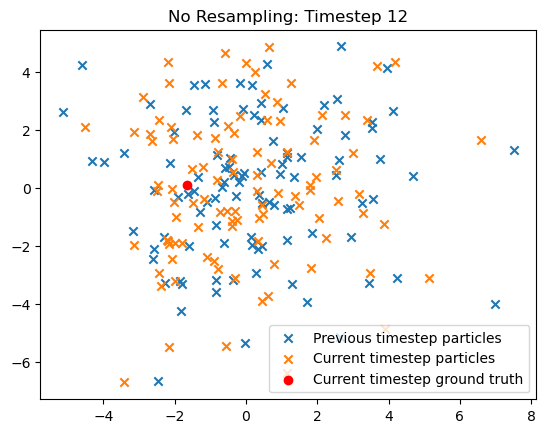

No resample


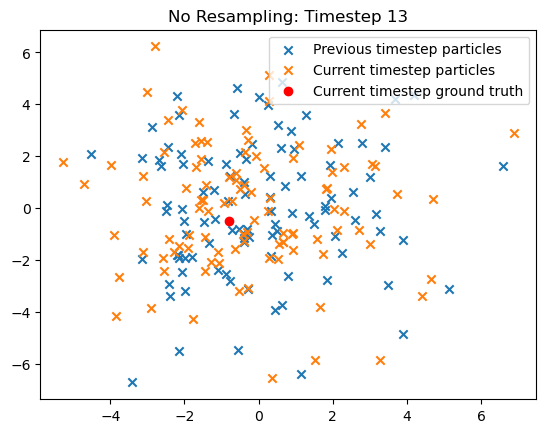

No resample


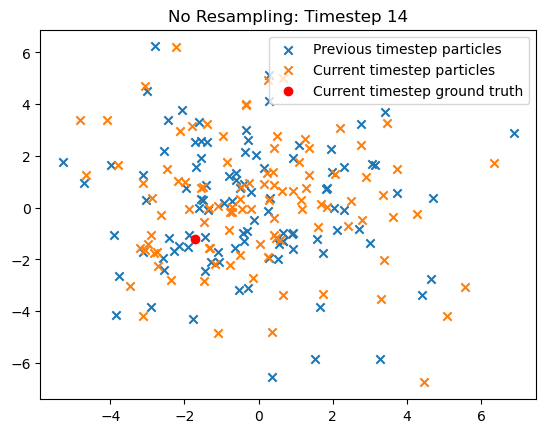

No resample


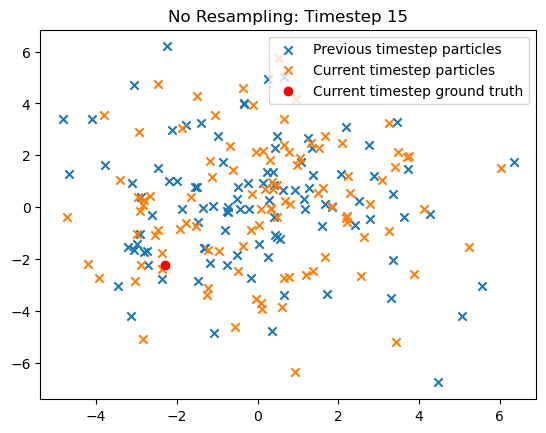

No resample


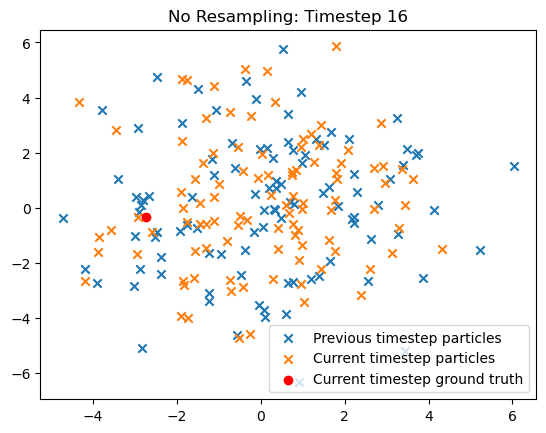

No resample


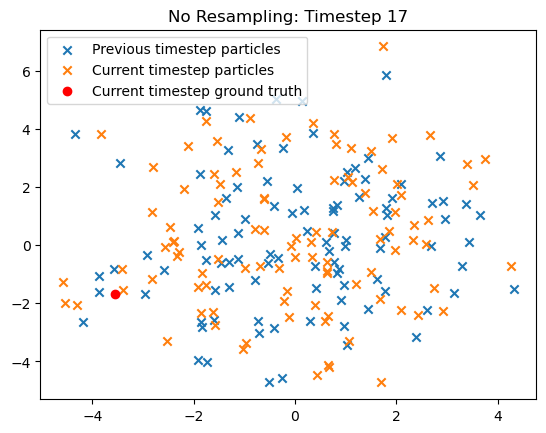

No resample


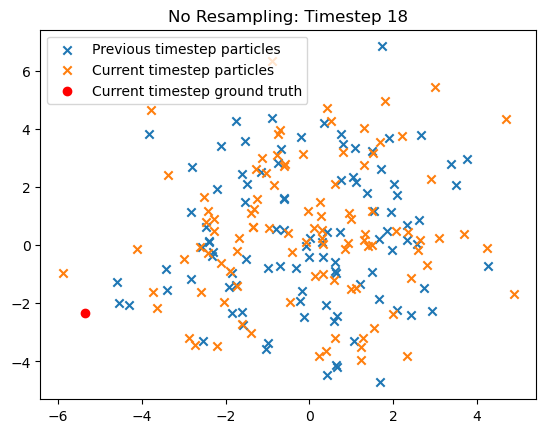

No resample


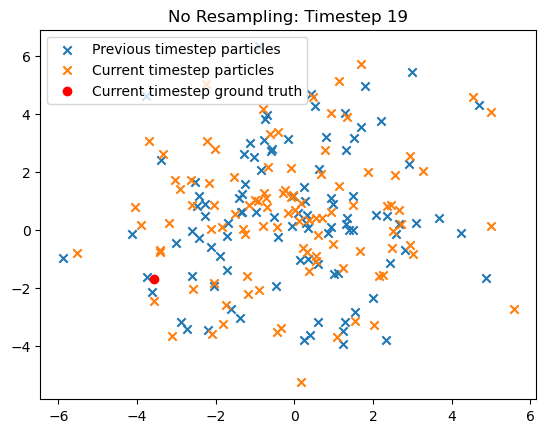

No resample


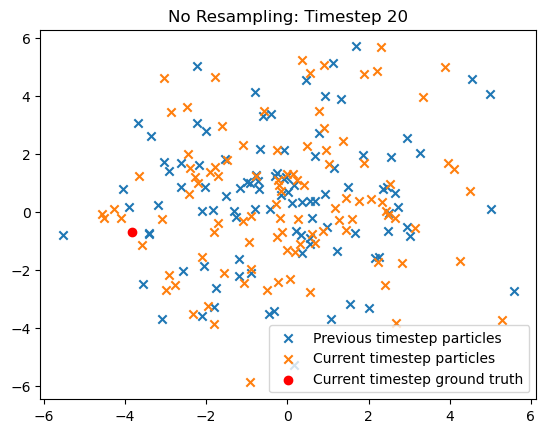

No resample


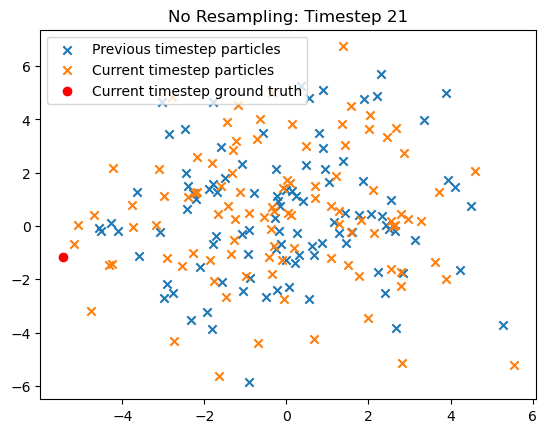

No resample


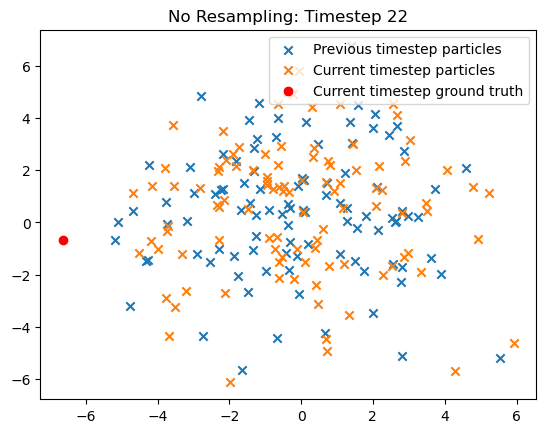

No resample


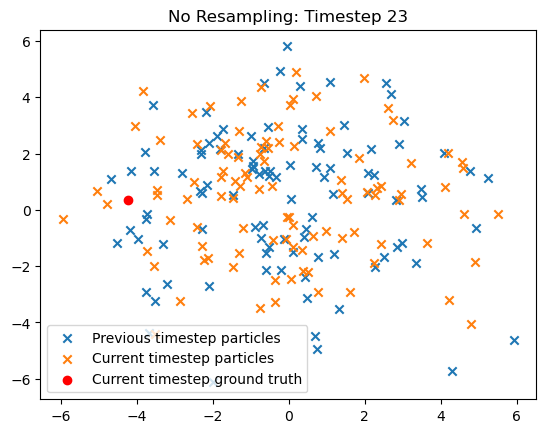

No resample


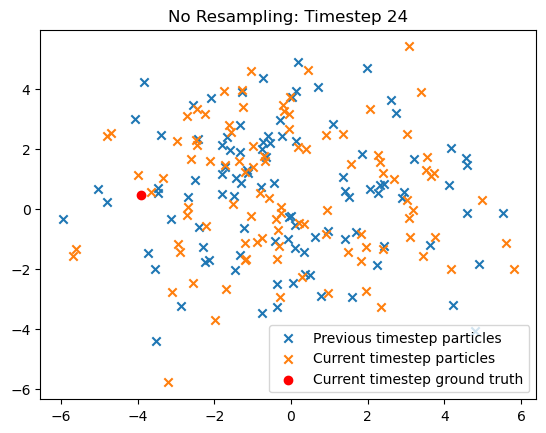

No resample


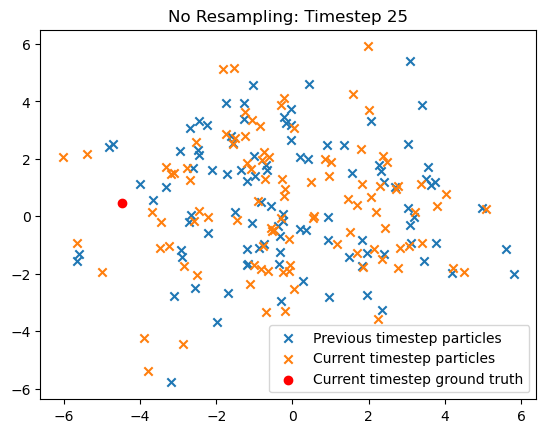

No resample


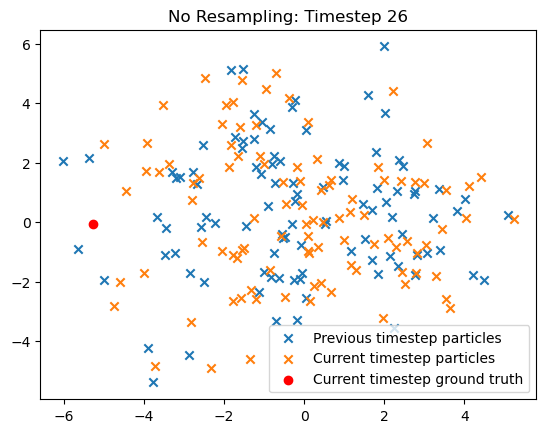

No resample


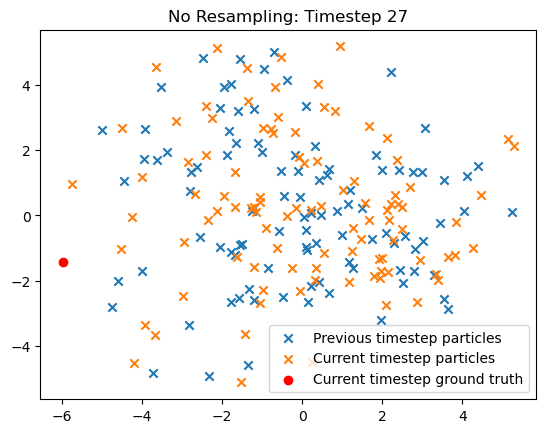

No resample


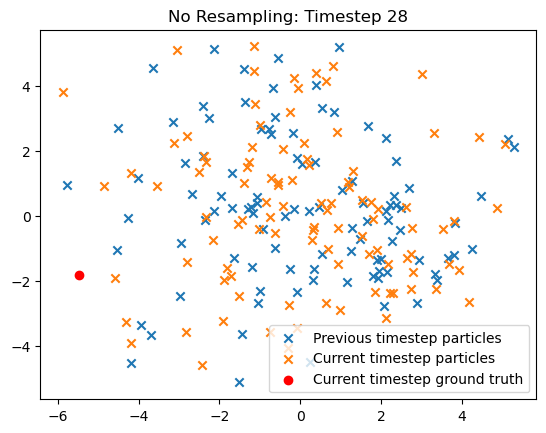

No resample


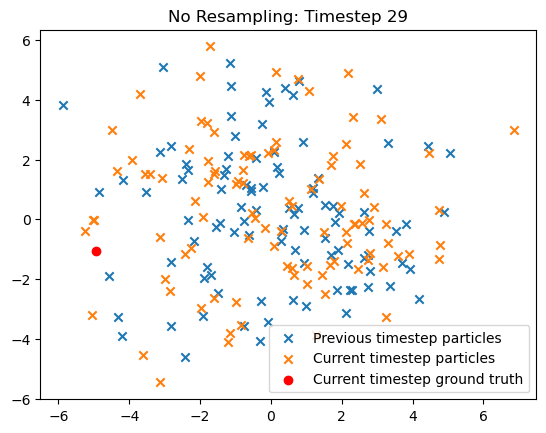

No resample


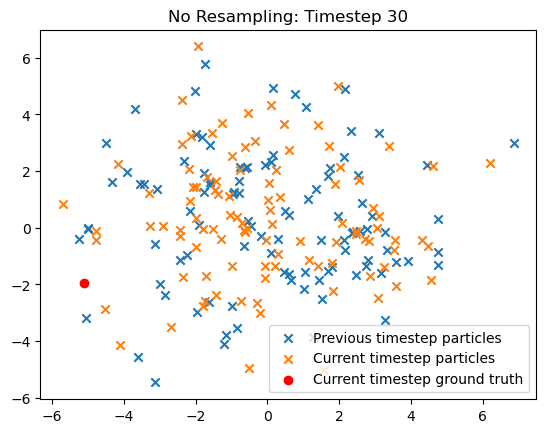

No resample


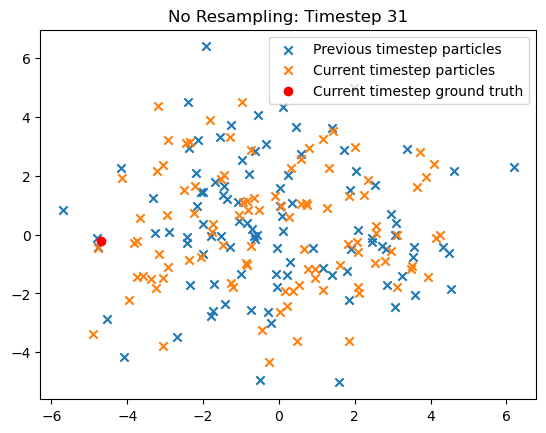

No resample


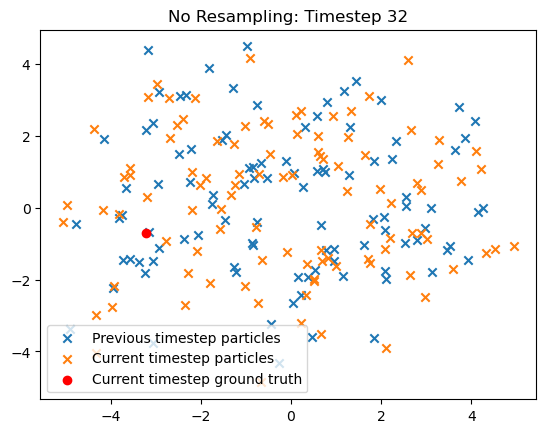

No resample


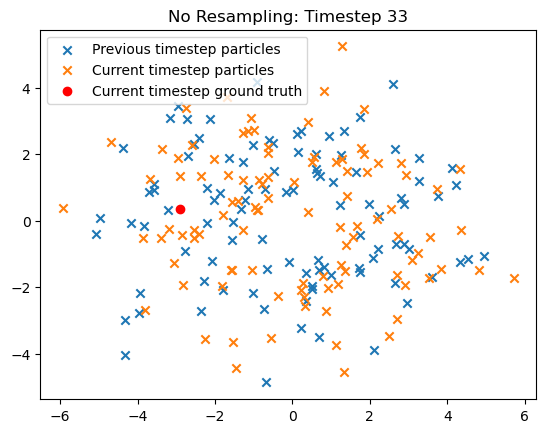

No resample


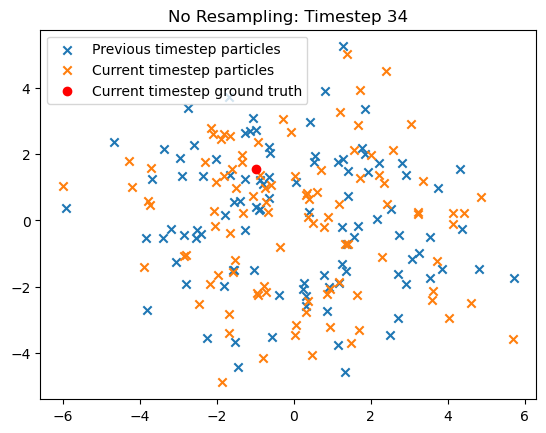

No resample


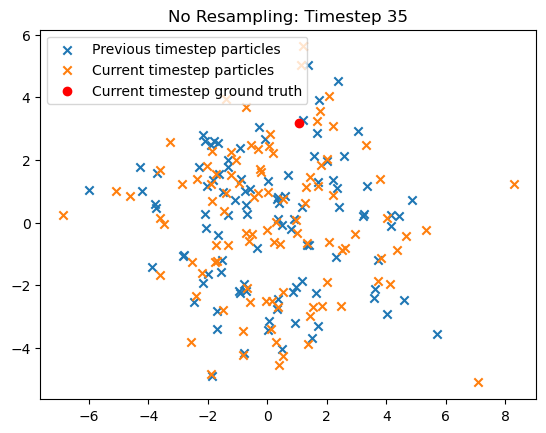

No resample


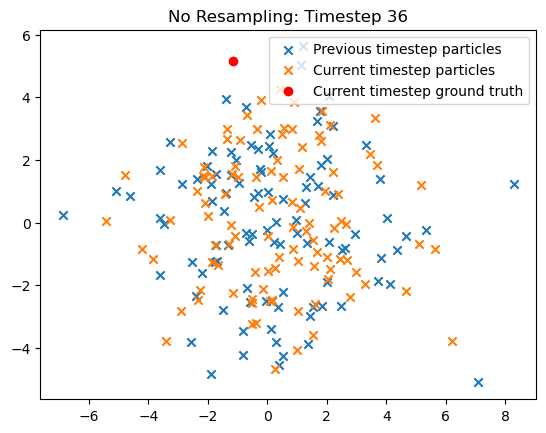

No resample


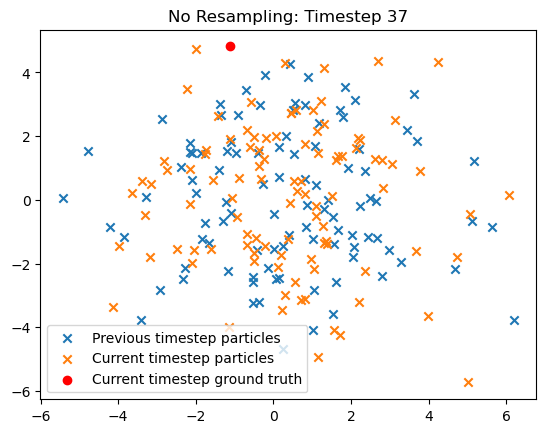

No resample


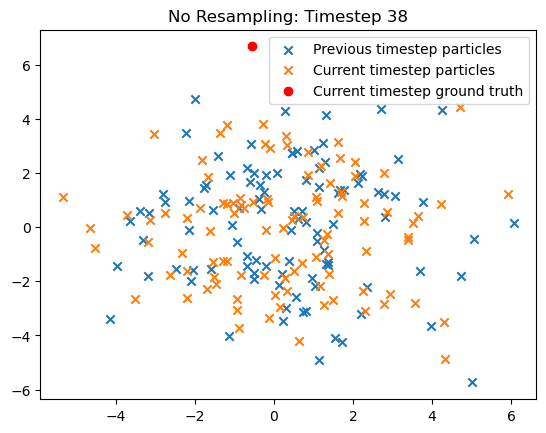

No resample


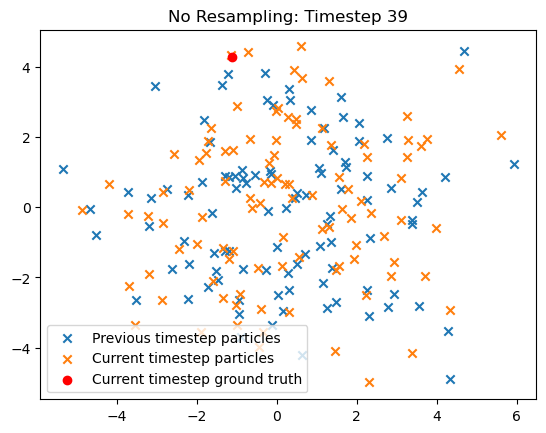

No resample


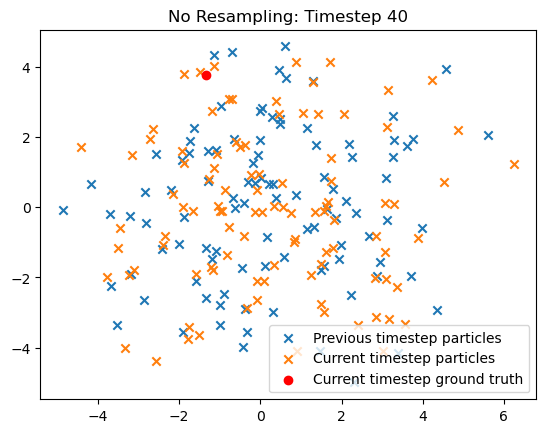

No resample


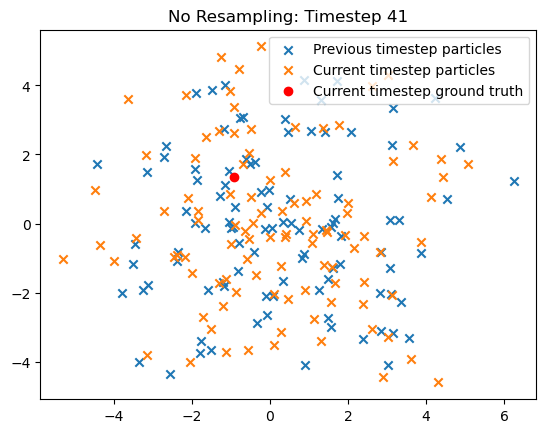

No resample


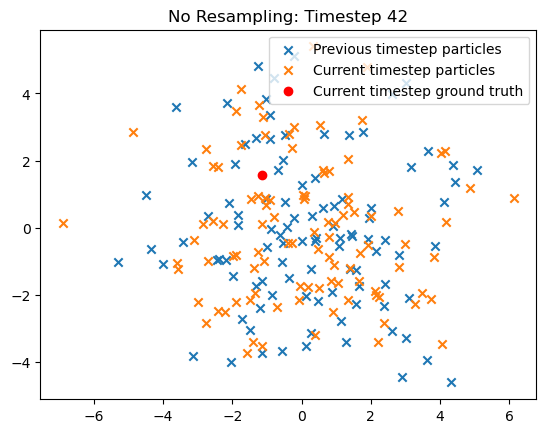

No resample


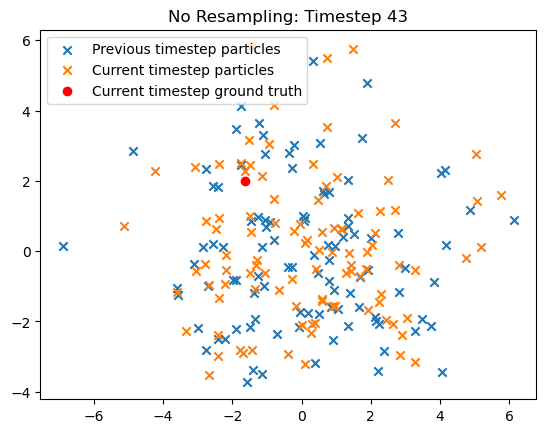

No resample


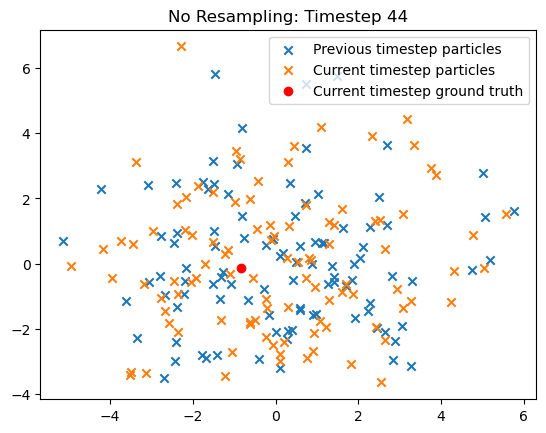

No resample


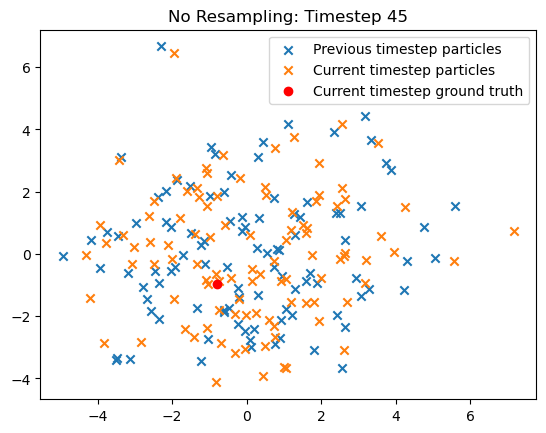

No resample


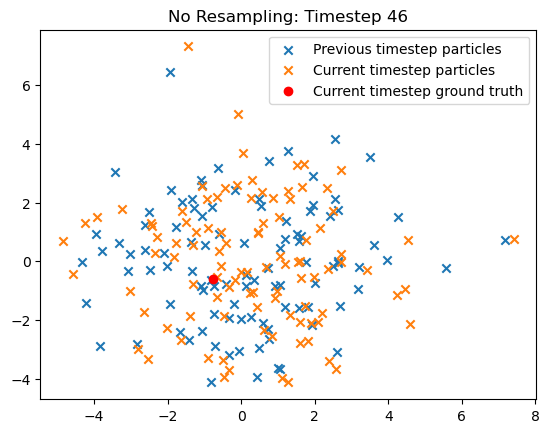

No resample


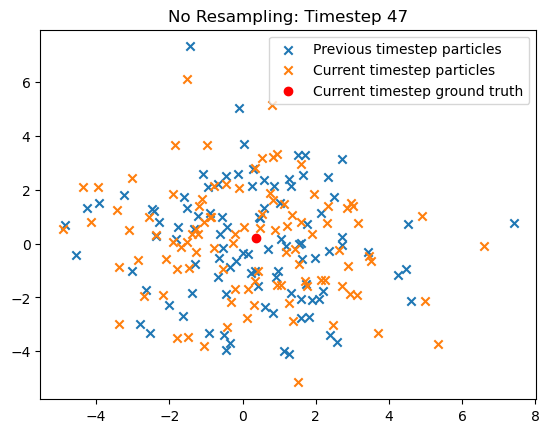

No resample


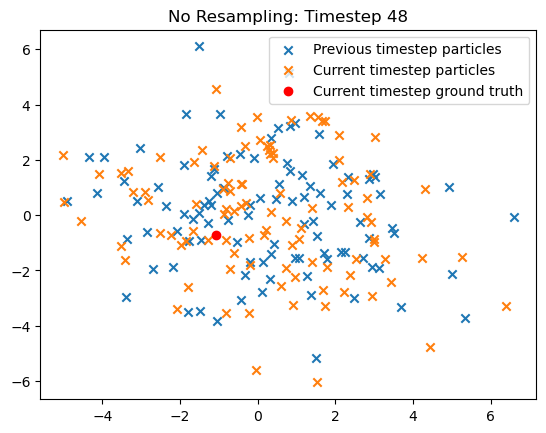

No resample


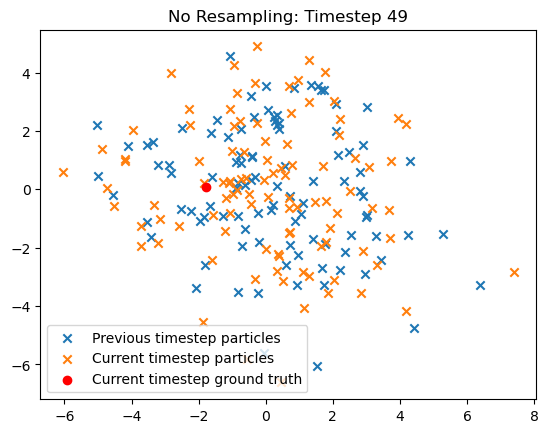

No resample


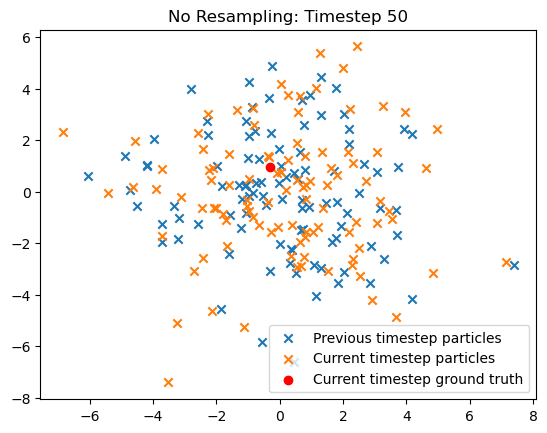

In [6]:
from fk_filtering import *
from fk_filtering import training
from fk_filtering.models.Linear_Gauss import Net
from fk_filtering.resampling import Soft_Resampler_Systematic
from fk_filtering.loss import Supervised_L2_Loss
loss = Supervised_L2_Loss(lambda x: x)
train_model = Net.Gaussian_Det_Bootstrap(0.9*pt.eye(2), pt.eye(2), pt.eye(2)/0.1)
DPF = simulation.Differentiable_Particle_Filter(train_model, 100, Soft_Resampler_Systematic(1), 0, loss, 1000)
reporter = Filtering_Mean(lambda x: x)
data = SimulatedDataset('./fk_filtering/models/Linear_Gauss/data/', lazy = True)
#training.test(DPF, loss, [reporter], 50, data, 10)
data_l = pt.utils.data.DataLoader(data, 10, shuffle=False, collate_fn=data.collate)
for i, d in enumerate(data_l):
    if i > 0:
        break
    DPF.initialise(d)
    DPF.eval()
    DPF.display_particles(50, (0, 1),['', ''], 'No Resampling')

In [1]:
from fk_filtering import *
from fk_filtering import training
from fk_filtering.models.Linear_Gauss import Net
from fk_filtering.resampling import OT_Resampler
from fk_filtering.loss import supervised_L2_loss
loss = lambda a,b: supervised_L2_loss(a, b, lambda x: x)
train_model = Net.Jiaxi_test(1, 1, 0.1)
DPF = simulation.Differentiable_Particle_Filter(train_model, 100, OT_Resampler(0.1, 0.01, 100, 0.9), 1000)
reporter = Filtering_Mean(lambda x: x)
data = SimulatedDataset('./fk_filtering/models/Linear_Gauss/data/', lazy = True)
training.e2e_train_jiaxi(DPF, loss, [reporter], 50, data, 10, 1, 1, 0.02, 10)

KeyboardInterrupt: 

In [ ]:
for p in DPF.parameters():
    print(p.grad)

tensor([0.0237], device='cuda:0')
tensor([-0.1447], device='cuda:0')
tensor([-0.0016], device='cuda:0')
tensor([0.0386], device='cuda:0')
tensor([[-0.0009]], device='cuda:0')
tensor([[ 0.0510, -0.0039]], device='cuda:0')


In [ ]:
print(pt.min(pt.rand((1000))))

tensor(4.2379e-05)


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '0'

In [ ]:
from fk_filtering import *
from fk_filtering import training
from fk_filtering.models.Linear_Gauss import Net
from fk_filtering.resampling import Soft_Resampler_Systematic
from fk_filtering.loss import supervised_L2_loss
loss = lambda a,b: supervised_L2_loss(a, b, lambda x: x)
train_model = Net.Gaussian_Test_Uniform_Bootstrap(0.9*pt.eye(1), pt.eye(1), pt.eye(1))
DPF = simulation.Differentiable_Particle_Filter(train_model, 1000, Soft_Resampler_Systematic(1), 1000)
reporter = Filtering_Mean(lambda x: x)
data = SimulatedDataset('./fk_filtering/models/Linear_Gauss/data/', lazy = False)
training.test(DPF, loss, [reporter], 50, data, 10)

100%|██████████| 500/500 [00:37<00:00, 13.19it/s]

Loss: 1.141228809595108


In [ ]:
from fk_filtering import *
from fk_filtering import training
from fk_filtering.models.Linear_Gauss import Net
from fk_filtering.resampling import Soft_Resampler_Systematic
from fk_filtering.loss import supervised_L2_loss

loss = lambda a,b: supervised_L2_loss(a, b, lambda x: x)
obs_model = Net.LikelihoodNet((4, 20, 20, 1))
train_model = Net.Gaussian_Test_Bootstrap(0.9*pt.eye(2), pt.eye(2), pt.eye(2)/(0.1), obs_model)
DPF = simulation.Differentiable_Particle_Filter(train_model, 50, Soft_Resampler_Systematic(1), 100)
reporter = Filtering_Mean(lambda x: x)
data = SimulatedDataset('./fk_filtering/models/Linear_Gauss/data/', lazy = False)
training.e2e_train(DPF, loss, [reporter], 50, data, 1, 0.8, 50, 0.001, 10)


In [ ]:
DPF.eval()
DPF.display_particles(10, (0))

TypeError: object of type 'int' has no len()